### Copyright © 2021, Chloe Wang

### Summary of Results

Test accuracy:\
MSE: 0.790\
R-sq: 0.260

Validation accuracy:\
MSE: 0.930\
R-sq: 0.225

# Code

In [2]:
# Importing libraries 
import pandas as pd # deals with tabular data
import numpy as np # lets you do math operations on arrays (a 1xn list)
import matplotlib.pyplot as plt # a base library for plotting
import seaborn as sns # also a library for plotting but adds to base library, makes plots nicer

from sklearn.preprocessing import StandardScaler # scales your data (z-score), min max values fr. -1 to 1, with mean 0
from sklearn.model_selection import cross_val_score, train_test_split # calculates CV score, and splits your data into training and validation sets
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet # functions to build LASSO and Ridge models 
from sklearn.metrics import mean_squared_error, r2_score # functions to calculate MSEs and R-sqrd

# Loading Data

In [3]:
# loading the training data
df = pd.read_csv("C:\\Users\\s64wa\\Dropbox\\Dropbox\\1_Chloe's Content\\1. UW\\2. Graduate\\5. 2021 Winter\\5. Econ 626 - Machine Learning for Economics\\4Z. midterm1_trainingdata (1).csv")

# Exploratory Data Analysis (EDA)

In [4]:
# shape of the data
df.shape # looks at # observations and # columns in the dataframe (table)

(19999, 14)

In [5]:
# looking at the some statistics for the data
df.describe()

,LOGVALUE,BATHS,BEDRMS,BUILT,UNITSF,LOT,ROOMS,REGION,KITCHEN,FLOORS,LAUNDY,RECRM,METRO,METRO3
count,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.00000,19999.000000,19999.000000,19999.000000
mean,12.054003,1.915196,3.207610,1970.747587,2339.850528,44339.419240,6.571029,2.842342,1.005350,1.931947,0.39192,0.073954,5.664483,1.886644
std,1.093036,0.779724,0.872225,25.543423,1969.763693,114513.834797,1.684882,1.007669,0.072951,1.033308,0.53957,0.271272,2.464029,1.010843
min,0.000000,0.000000,0.000000,1919.000000,99.000000,200.000000,2.000000,1.000000,1.000000,1.000000,0.00000,0.000000,1.000000,1.000000
25%,11.512925,1.000000,3.000000,1950.000000,1400.000000,6000.000000,5.000000,2.000000,1.000000,1.000000,0.00000,0.000000,7.000000,2.000000
50%,12.100712,2.000000,3.000000,1975.000000,2000.000000,11000.000000,6.000000,3.000000,1.000000,2.000000,0.00000,0.000000,7.000000,2.000000
75%,12.611538,2.000000,4.000000,1990.000000,2487.000000,43925.933653,8.000000,4.000000,1.000000,2.000000,1.00000,0.000000,7.000000,2.000000
max,15.476535,10.000000,8.000000,2011.000000,20159.000000,933185.000000,15.000000,4.000000,2.000000,21.000000,5.00000,3.000000,7.000000,9.000000


In [6]:
# looks to see if we have any missing data
df.isna().sum()

LOGVALUE    0
BATHS       0
BEDRMS      0
BUILT       0
UNITSF      0
LOT         0
ROOMS       0
REGION      0
KITCHEN     0
FLOORS      0
LAUNDY      0
RECRM       0
METRO       0
METRO3      0
dtype: int64

From the above, we can conclude that there isn't any missing values. Let's explore some of the outliers though to see if they make sense.

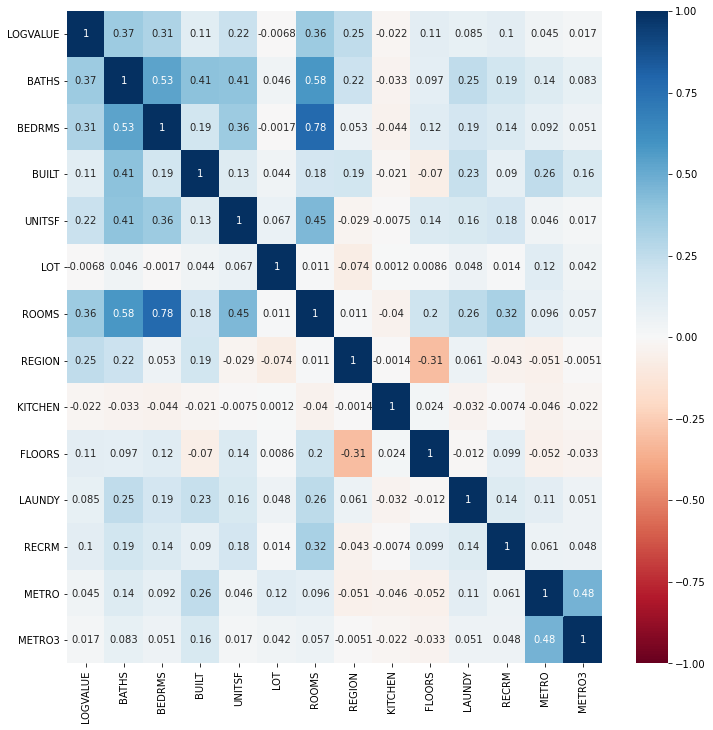

In [7]:
# let's look at the correlation heat map to look at correlation of variables
plt.figure(figsize = (12, 12)) # plot the figure 
sns.heatmap(df.corr(), vmin = -1, vmax= 1, center = 0 , cmap = 'RdBu', annot=True) # plots a heat map of the correlation

In [8]:
# We can also try looking at the Variation Inflation Factor (VIF)
# https://towardsdatascience.com/how-to-detect-and-deal-with-multicollinearity-9e02b18695f1
# from statsmodels.stats.outliers_influence import variance_inflation_factor

# Pre-processing

In [9]:
# looking at the columns
df.columns

Index(['LOGVALUE', 'BATHS', 'BEDRMS', 'BUILT', 'UNITSF', 'LOT', 'ROOMS',
       'REGION', 'KITCHEN', 'FLOORS', 'LAUNDY', 'RECRM', 'METRO', 'METRO3'],
      dtype='object')

In [10]:
# splitting the data into X and y
X = df.loc[:, 'BATHS':] # all rows, and columns from BATHS onwards, loc lets you do that
y = df['LOGVALUE']

# splitting the data into training and validation set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42) # 70% training data 30% test data

# Itertools Method

In [11]:
# Running different feature combinations to see which one provides the lowest MSE but it was too computationally intensive and took too long to run (did not complete)

In [12]:
# import itertools # library to iterate through lists
# cols = df.columns[1:] # all columns besides log value 
# combinations = {} # create a dictionary (maps some key to some value) for combinations
# combination_score = [] # to store the combination/MSE score
# for L in range(0, len(cols)+1): # running a for loop from 0 to length of columns we have
#   for idx, subset in enumerate(itertools.permutations(cols, L)): # function creates permuations, loops through number of combinations
#           combinations[idx] = subset # storing the index of combination set we're using with the combination
          
#           lm = LinearRegression() # assigning linear regression function to lm
          
#           temp_mse = cross_val_score(lm, X_train.loc[:, subset], y_train, cv=5, scoring='neg_mean_squared_error') # calculating the CV score with 5-fold validation

#           combination_score.append(np.mean(abs(temp_mse))) # adding the average MSE to the list

Other things to try:
* Normalize data
* Standard Scalar

# Model Fitting

Let's try to build a couple of models to see how they fare against each other. We also want to try building a simple linear model to use as a baseline to know if our Lasso and Ridge models are doing better than them. The simple linear model will just fit the data as is w/o any feature selection/engineering.

The data will be split 70/30 train/test.

## Linear Regression

In [13]:
# Let's try build a simple linear regression as the baseline
lm = LinearRegression()

# fitting the model
lm.fit(X_train, y_train)

LinearRegression()

In [14]:
# let's look at the prediction scores
# predicting on the training and testing data
y_train_pred_lm = lm.predict(X_train)
y_test_pred_lm = lm.predict(X_test)

# calculate MSE scores
lm_mse_train = mean_squared_error(y_train, y_train_pred_lm)
lm_mse_test = mean_squared_error(y_test, y_test_pred_lm)

# displaying the scores
print(f'Linear Model Train MSE: {lm_mse_train}')
print(f'Linear Model Test MSE: {lm_mse_test}')

Linear Model Train MSE: 0.9187974332066167
Linear Model Test MSE: 0.9297017499006193


The linear model returns really low MSEs (0.91) and may be tough to beat with the Lasso and Ridge models.

## Standardizing our data

In [15]:
# Now let's try standardizing all predictors to make our results scale-invariant, we only need to do this once
scaler = StandardScaler() # defines our scaler function

# fit scaler to values of X of trianing data and standardizing it
X_train_scale = scaler.fit_transform(X_train) # fit model on training set

# standardizing our test data
X_test_scale = scaler.transform(X_test)


In [16]:
# using the standardized data, calculate a linear regression
lm_scale = LinearRegression()

# fitting the model
lm_scale.fit(X_train_scale, y_train)

LinearRegression()

In [17]:
# let's look at the prediction scores for the standardized data
# predicting on the training and testing data
y_train_pred_lm_scale = lm_scale.predict(X_train_scale)
y_test_pred_lm_scale = lm_scale.predict(X_test_scale)

# calculate MSE scores
lm_mse_train_scale = mean_squared_error(y_train, y_train_pred_lm_scale)
lm_mse_test_scale = mean_squared_error(y_test, y_test_pred_lm_scale)

# displaying the scores
print(f'Linear Model Train MSE: {lm_mse_train_scale}')
print(f'Linear Model Test MSE: {lm_mse_test_scale}')

Linear Model Train MSE: 0.9187974332066167
Linear Model Test MSE: 0.9297017499006015


When we standardize the data for the linear model, the MSEs are about the same. 

## Lasso Regression

In [18]:
# setting up lasso model
lasso = Lasso(alpha = 1, random_state = 42) # setting alpha=1 (which is our "lambda") to see what it spits out and random state of 41 so we can replicate the results

# fitting lasso model
lasso.fit(X_train, y_train) # fits our model to the training data (best fit)

Lasso(alpha=1, random_state=42)

In [19]:
# let's look at the prediction scores
# predicting on the training and testing data, y-hats
y_train_pred_lasso = lasso.predict(X_train) # train set
y_test_pred_lasso = lasso.predict(X_test) # test set

# calculating MSE scores for LASSO
lasso_mse_train = mean_squared_error(y_train, y_train_pred_lasso) # train set
lasso_mse_test = mean_squared_error(y_test, y_test_pred_lasso) # test set

# printing the scores
print(f'Lasso Model Train MSE: {lasso_mse_train}')
print(f'Lasso Model Test MSE: {lasso_mse_test}')

Lasso Model Train MSE: 1.122816891925564
Lasso Model Test MSE: 1.1336216534614156


Out of the box, the lasso model does worse than our simple linear model. We will need to go back and tune the parameters on this.

## Now using standardized data

In [20]:
# setting up lasso model using standardized data
lasso_scale = Lasso(alpha = 1, random_state = 42) # setting alpha=1 (which is our "lambda") to see what it spits out and random state of 41 so we can replicate the results

# fitting lasso model
lasso_scale.fit(X_train_scale, y_train) # fits our model to the training data (best fit)

Lasso(alpha=1, random_state=42)

In [21]:
# let's look at the prediction scores using standardized data
# predicting on the training and testing data, y-hats
y_train_pred_lasso_scale = lasso_scale.predict(X_train_scale) # train set
y_test_pred_lasso_scale = lasso_scale.predict(X_test_scale) # test set

# calculating MSE scores for LASSO
lasso_mse_train_scale = mean_squared_error(y_train, y_train_pred_lasso_scale) # train set
lasso_mse_test_scale = mean_squared_error(y_test, y_test_pred_lasso_scale) # test set

# printing the scores
print(f'Lasso Model Train MSE: {lasso_mse_train_scale}')
print(f'Lasso Model Test MSE: {lasso_mse_test_scale}')

Lasso Model Train MSE: 1.192454438497368
Lasso Model Test MSE: 1.1998536212464497


When we standardize the data for the LASSO model, the MSEs are worse.

## Ridge Regression

In [22]:
# setting up ridge model
ridge = Ridge(alpha = 1, random_state = 42) # same as above, for but Ridge setting alpha=1 and random state=42

# fitting lasso model
ridge.fit(X_train, y_train) # best fit

Ridge(alpha=1, random_state=42)

In [23]:
# let's look at the prediction scores
# predicting on the training and testing data, y-hats
y_train_pred_ridge = ridge.predict(X_train)
y_test_pred_ridge = ridge.predict(X_test)

# calculating MSE scores
ridge_mse_train = mean_squared_error(y_train, y_train_pred_ridge)
ridge_mse_test = mean_squared_error(y_test, y_test_pred_ridge)

# displaying the scores
print(f'Ridge Model Train MSE: {ridge_mse_train}')
print(f'Ridge Model Test MSE: {ridge_mse_test}')

Ridge Model Train MSE: 0.9187974698920249
Ridge Model Test MSE: 0.9296960425539627


The ridge regression is a bit better than the linear model and may overall be the best model when we tune the parameters.

## Now using standardized data

In [24]:
# setting up ridge model with standardized data
ridge_scale = Ridge(alpha = 1, random_state = 42) # same as above, for but Ridge setting alpha=1 and random state=42

# fitting lasso model
ridge_scale.fit(X_train_scale, y_train) # best fit

Ridge(alpha=1, random_state=42)

In [25]:
# let's look at the prediction scores with standardized data
# predicting on the training and testing data, y-hats
y_train_pred_ridge_scale = ridge_scale.predict(X_train_scale)
y_test_pred_ridge_scale = ridge_scale.predict(X_test_scale)

# calculating MSE scores
ridge_mse_train_scale = mean_squared_error(y_train, y_train_pred_ridge_scale)
ridge_mse_test_scale = mean_squared_error(y_test, y_test_pred_ridge_scale)

# displaying the scores
print(f'Ridge Model Train MSE: {ridge_mse_train_scale}')
print(f'Ridge Model Test MSE: {ridge_mse_test_scale}')

Ridge Model Train MSE: 0.9187974348615554
Ridge Model Test MSE: 0.9297009245646635


When we standardize the data for the Ridge model, the MSEs are slightly worse.

**Conclusion**: standardizing our data does not improve our MSE scores. Let's tune our parameters without the standardized data.

# Hyperparameter Tuning

Playing around to see which alpha provides the best MSE using CV

## Lasso Tuning

In [26]:
# declaring empty dictionary to store LASSO CV scores
lasso_cv_score_dict = {}

# running a for loop to change alpha
for i in np.linspace(0.1, 10, 50): # linspace creates a list from 0.1 to 10 and divides it into 50 equal parts
  # setting up lasso model
  lasso = Lasso(alpha = i, random_state = 42)

  # fitting lasso model
  lasso_cv_mse = cross_val_score(lasso, X_train, y_train, scoring= 'neg_mean_squared_error') # using default 10-fold

  # adding cv_mse to list
  lasso_cv_score_dict[i] = np.mean(abs(lasso_cv_mse)) # using alpha as a key, we're storing the avg MSEs to our dictionary

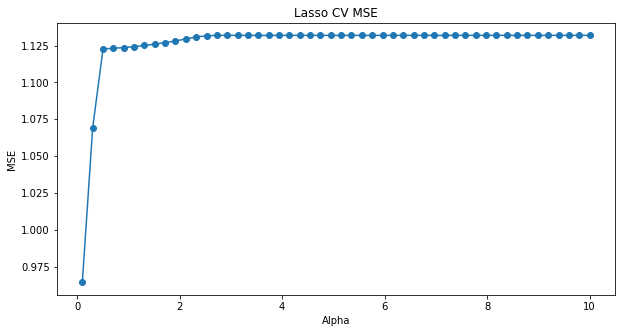

In [27]:
# plot our results on a graph to see which level of alpha yields the best MSE
plt.figure(figsize = (10, 5)) # defining the figure/plot size
plt.scatter(lasso_cv_score_dict.keys(), lasso_cv_score_dict.values()) # create a scatterplot 
plt.plot(list(lasso_cv_score_dict.keys()), list(lasso_cv_score_dict.values())) # connects the dots
plt.title('Lasso CV MSE') # title our plot
plt.xlabel('Alpha') # labels x-axis
plt.ylabel('MSE') # labels y-axis
plt.show() # prints/displays the plot

From our results, it looks like an alpha of 0.1 or close to 0 yields the best MSE (score), closest to a linear regression.

## Ridge

In [28]:
# declaring empty list to store cv_scores
cv_score_dict_ridge = {}

# running a for loop to change alpha
for i in np.linspace(0.1, 50, 50): # linspace creates a list from 0.1 to 10 and divides it into 50 equal parts
  # setting up lasso model
  ridge = Ridge(alpha = i, random_state = 42) 

  # fitting lasso model
  ridge_cv_mse = cross_val_score(ridge, X_train, y_train, scoring= 'neg_mean_squared_error') # using default 10-fold

  # adding cv_mse to list
  cv_score_dict_ridge[i] = np.mean(abs(ridge_cv_mse)) # appending our calculations into the dictionary

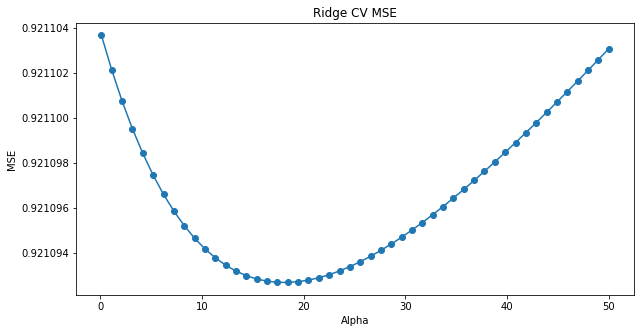

In [29]:
# plot our results on a graph to see which level of alpha yields the best MSE
plt.figure(figsize = (10, 5)) # defining the figure/plot size
plt.scatter(cv_score_dict_ridge.keys(), cv_score_dict_ridge.values()) # create a scatterplot 
plt.plot(list(cv_score_dict_ridge.keys()), list(cv_score_dict_ridge.values())) # connects the dots
plt.title('Ridge CV MSE')  # title our plot
plt.xlabel('Alpha') # labels x-axis
plt.ylabel('MSE') # labels y-axis
plt.show() # prints/displays the plot

In [30]:
# looks at the min. MSE score returned
min(cv_score_dict_ridge.values())

0.9210926894323643

In [31]:
# look at corresponding level of alpha that matches the MSE above, in this case, alpha=18
cv_score_dict_ridge

{0.1: 0.9211036521202456,
 1.1183673469387756: 0.9211021093429743,
 2.136734693877551: 0.9211007305618877,
 3.1551020408163266: 0.9210995018859659,
 4.173469387755102: 0.9210984107244766,
 5.191836734693878: 0.9210974456502816,
 6.210204081632653: 0.9210965962792587,
 7.228571428571428: 0.9210958531637253,
 8.246938775510204: 0.9210952076980602,
 9.26530612244898: 0.9210946520349685,
 10.283673469387756: 0.9210941790110614,
 11.30204081632653: 0.9210937820805988,
 12.320408163265306: 0.9210934552563999,
 13.338775510204082: 0.9210931930570645,
 14.357142857142856: 0.9210929904597549,
 15.375510204081632: 0.9210928428578896,
 16.39387755102041: 0.9210927460231846,
 17.412244897959184: 0.9210926960715426,
 18.43061224489796: 0.9210926894323643,
 19.448979591836736: 0.9210927228208956,
 20.467346938775513: 0.921092793213283,
 21.485714285714288: 0.921092897824041,
 22.50408163265306: 0.9210930340856752,
 23.52244897959184: 0.921093199630232,
 24.540816326530614: 0.921093392272574,
 25.559

So for Ridge, our  model returns the lowest MSE when we set our tuning parameter alpha (or "lambda") to 18, which has an MSE of 0.921. Compare that to our linear regression model, which has an MSE of 0.929.

## Conclusion

The best model is the Ridge regression with an tuning parameter of 18 (alpha or lamdba = 18).

In [32]:
# setting up ridge model
ridge = Ridge(alpha = 18, random_state = 42) # same as above, for but Ridge setting alpha=18 and random state=42

# fitting lasso model
ridge.fit(X_train, y_train) # best fit

Ridge(alpha=18, random_state=42)

In [33]:
# let's look at the prediction scores
# predicting on the training and testing data, y-hats
y_train_pred_ridge = ridge.predict(X_train)
y_test_pred_ridge = ridge.predict(X_test)

# calculating MSE scores
ridge_mse_train = mean_squared_error(y_train, y_train_pred_ridge)
ridge_mse_test = mean_squared_error(y_test, y_test_pred_ridge)

# displaying the scores
print(f'Ridge Model Train MSE: {ridge_mse_train}')
print(f'Ridge Model Test MSE: {ridge_mse_test}')

Ridge Model Train MSE: 0.9188054829357646
Ridge Model Test MSE: 0.9296234869456405


The best model is the Ridge regression with a lambda of 18. 

   ## Question 2.
   

### Constructing a graphical illustration of the relative importance of different features in final model.

In [34]:
ridge.coef_ # Displays beta values

array([ 2.16616764e-01,  1.77502625e-02, -1.68006747e-03,  3.52240395e-05,
       -8.17954047e-08,  1.47059743e-01,  2.89471091e-01, -1.56048640e-01,
        1.15136490e-01, -8.89218559e-02, -1.84356370e-02,  1.61136036e-02,
       -1.54970537e-02])

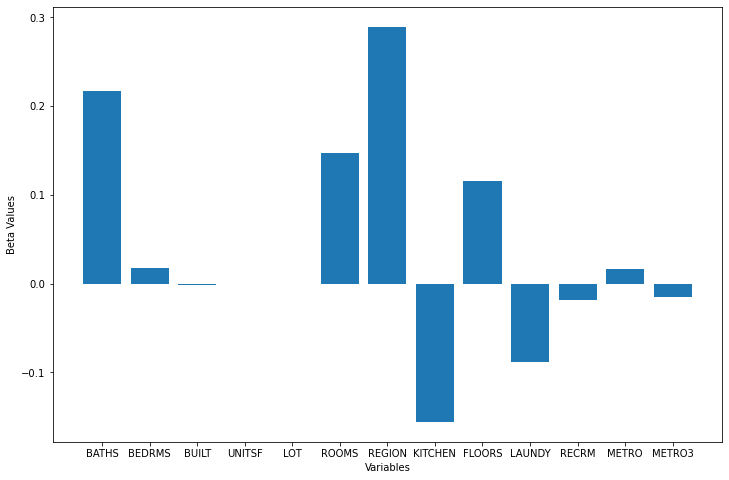

In [52]:
plt.figure(figsize = (12, 8))
plt.bar(X_train.columns, ridge.coef_)
plt.xlabel('Variables')
plt.ylabel('Beta Values')
plt.show()

## Prediction Competition Test Set

In [37]:
# Loading the data
test_df = pd.read_csv("C:\\Users\\s64wa\\Dropbox\\Dropbox\\1_Chloe's Content\\1. UW\\2. Graduate\\5. 2021 Winter\\5. Econ 626 - Machine Learning for Economics\\4Z. assignment2_testdata (1).csv")


In [39]:
# Looking at the first five rows of the data
test_df.head()

,LOGVALUE,BATHS,BEDRMS,BUILT,UNITSF,LOT,ROOMS,REGION,KITCHEN,FLOORS,LAUNDY,RECRM,METRO,METRO3
0,12.345835,2,3,1919,1300.0,15900.0,7,1,1,3,0,0,7,2
1,13.122363,3,4,1960,3000.0,44000.0,10,3,1,2,0,0,7,9
2,12.429216,1,3,1975,3100.0,44000.0,7,2,1,3,0,0,7,2
3,12.154779,1,2,1940,1480.0,2450.0,4,4,1,2,0,0,1,1
4,11.156251,2,3,2000,1200.0,11000.0,6,3,1,2,0,0,7,2


In [41]:
# Defining x and y variables
Xtestset = test_df.loc[:, 'BATHS':] # all rows, and columns from BATHS onwards, loc lets you do that
ytestset = test_df['LOGVALUE']

In [43]:
# Use model to estimate y_hat
ytestset_prediction = ridge.predict(Xtestset)

In [44]:
# Calculate MSE of test set
testset_MSE = mean_squared_error(ytestset, ytestset_prediction)

In [45]:
testset_MSE # Display output

0.7898122641058272

In [46]:
# Calculate R-squared of test set
testset_Rsq = r2_score(ytestset, ytestset_prediction)

In [47]:
testset_Rsq # Display output

0.2600248756487906

In [48]:
# Calculate MSE and R-squared of validation set
ridge_mse_test = mean_squared_error(y_test, y_test_pred_ridge)
validationset_Rsq = r2_score(y_test, y_test_pred_ridge)

In [49]:
ridge_mse_test # Display output

0.9296234869456405

In [50]:
validationset_Rsq # Display output

0.22517792444125462